MODELO ESTRUCTURAL DE OPENSEESPY

Paso 1: Importación de librerías

In [ ]:
# ============================================
# IMPORTAR LIBRERÍAS.
# ============================================
import openseespy.opensees as ops
import opsvis as opsv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv as csv
# comentario 


Paso 2: Limpieza de modelo

In [ ]:
# ============================================
# LIMPIAR MODELO ANTERIOR
# ============================================
# Esto asegura que no haya datos de modelos previos
ops.wipe()

Paso 3: Creación de Modelo

In [ ]:
# ============================================
# CREAR MODELO
# ============================================
# 'basic': tipo de modelo
# '-ndm', 3: número de dimensiones (3D)
# '-ndf', 6: grados de libertad por nodo (x, y, z, rotX, rotY, rotZ)
ops.model('basic', '-ndm',3, '-ndf',6)

# Definición de transformaciones geométricas
ops.geomTransf("PDelta",1,*[1,0,0]) #Transformación para columnas
ops.geomTransf("Linear",2,*[0,0,1]) #Transformación para vigas


print("Modelo 3D creado exitosamente")



Modelo 3D creado exitosamente


Paso 4: Definición de sistema de unidades

In [ ]:
# ============================================
# DEFINICIÓN DE SISTEMA DE UNIDADES
# ============================================
#Las unidades estándar del proyecto serán kN,m,seg
#Se definen los factores de conversión de unidades

ops.defaultUnits("-force", "kN", "-length", "m", "-time", "sec", "-temp", "C")
kN = 1
m = 1
seg=1
cm = 0.01
mm = 0.001
N = 1000
kgf = 101.9716
tonf = 1000
MPa = 1000
GPa = 1000000
g = 9.81

Paso X: Definición de Geometría

In [ ]:
# ============================================
# DEFINICIÓN DE GEOMETRÍA
# ============================================

L12=4.50*m  #Longitud entre ejes 1 y 2
L23=6.50*m  #Longitud entre ejes 2 y 3
L34=6.50*m  #Longitud entre ejes 3 y 4
L45=4.45*m  #Longitud entre ejes 4 y 5

LAB=5.75*m  #Longitud entre ejes A y B
LBC=5.75*m  #Longitud entre ejes B y C

H1=3.10*m   #Altura piso 1
H2=3.10*m   #Altura piso 2
H3=3.10*m   #Altura piso 3

Apiso = ( L12 + L23 + L34 + L45 ) * ( LAB + LBC )  # Área del entrepiso

PasoX : Definición de acero de refuero

In [ ]:
# ============================================
# DEFINICIÓN DE BARRAS DE REFUERZO
# ============================================
DbarNo3=9.5*mm             # Diámetro de barra de refuerzo #3
AbarNo3=71*mm**2           # Área de barra de refuerzo #3
DbarNo4=12.7*mm            # Diámetro de barra de refuerzo #4
AbarNo4=129*mm**2          # Área de barra de refuerzo #4
DbarNo5=15.9*mm            # Diámetro de barra de refuerzo #5
AbarNo5=199*mm**2          # Área de barra de refuerzo #5
DbarNo6=19.1*mm            # Diámetro de barra de refuerzo #6
AbarNo6=284*mm**2          # Área de barra de refuerzo #6
DbarNo7=22.2*mm            # Diámetro de barra de refuerzo #7
AbarNo7=387*mm**2          # Área de barra de refuerzo #7
DbarNo8=25.4*mm            # Diámetro de barra de refuerzo #8
AbarNo8=510*mm**2          # Área de barra de refuerzo #8

# ============================================
# DEFINICIÓN DE MATERIAL DE ACERO DE REFUERZO
# ============================================

#1.Acero de refuerzo usando el modelo ReinforcingSteel
#Filippou, F. C., Popov, E. P., & Bertero, V. V. (1983). Effects of bond deterioration on hysteretic behavior of reinforced concrete joints.
fy=420*MPa        # Límite elástico
Es=200*GPa        # Módulo de elasticidad
endur=0.01        # Pendiente de endurecimiento
R0 = 20           # Parámetro de forma (típico: 15-25)
cR1 = 0.925       # Parámetro de control de transición
cR2 = 0.15        # Parámetro de control de transición
ops.uniaxialMaterial('Steel02', 1, fy, Es,endur,R0, cR1, cR2)

# ==================================
# PROPIEDADES DEL ACERO DE ESTRIBOS
# ==================================

fyh=420*MPa    # Límite elástico del acero de estribos
haRatio=0.01   # Tasa de endurecimiento del acero de estribos 
mu=1000        # Factor de ductilidad del acero de estribos


Paso X:Definición de sección transversal de vigas

In [ ]:
# ==============================================
# DEFINICIÓN DE GEOMETRÍA DE SECCIÓN TRANSVERSAL
# ==============================================

#1.Sección de viga concreto rectangular maciza con dimensiones b1 x h1 y refuerzo superior con doble fila de 4 barras #6 e inferior 4 barras #6 y estribos #3 
b1=0.30*m            # Ancho de la sección trasversal 1
h1=0.45*m            # Alto de la sección transversal 1
rec1=0.04*m          # Recubrimiento de concreto
nb1=b1-(2*rec1)      # Ancho de núcleo de la sección transversal 1
nh1=h1-(2*rec1)      # Alto de núcleo de la sección transversal 1
Ecprom=24738*MPa     # Módulo de elasticidad promedio del concreto - entre 21 y 35 MPa
ν=0.15               # Módulo de Poisson
G=Ecprom/(2*(1+ν))   # Módulo de cortante
J=(b1*h1**3/16)*(1/3-0.21*(h1/b1)*(1-(h1/b1)**4/12))  #Momento polar de inercia torsional

# ===============================================
# DEFINICIÓN DE MATERIALES DE SECCIÓN TRANSVERSAL
# ===============================================

#2.Concreto para zona inconfinada usando el modelo Concrete02 - f'c= 21 MPa
# Mander, J. B., Priestley, M. J. N., & Park, R. (1988). Theoretical stress-strain model for confined concrete.
k2=1.00           # Factor de confinamiento de Mander
fc2=-21000        # Resistencia a la compresión inconfinada
fck2=k2*fc2       # Resistencia a la compresión característica
Ec2=21538106      # Módulo de elasticidad del concreto
epsc02=-0.002     # Deformación unitaria en resistencia máxima
fpcu2=0.25*fc2    # Resistencia última a compresión
epscu2=-0.004     # Deformación unitaria en resistencia última
lambdaC2=0.1      # Pendiente post pico tensil
ft2=0.1*abs(fc2)  # Resistencia a tracción(10%*f'c)
Ets2=0.02*Ec2     # Módulo de elasticidad en tracción(2%*Ec)
ops.uniaxialMaterial('Concrete02', 2, fck2, epsc02, fpcu2, epscu2, lambdaC2,ft2,Ets2)

#3.Concreto para zona confinada usando el modelo ConfinedConcrete01 - f'c= 21 MPa
# Mander, J. B., Priestley, M. J. N., & Park, R. (1988). Theoretical stress-strain model for confined concrete.
fc3=-21000        # Resistencia a la compresión inconfinada
Ec3=21538106      # Módulo de elasticidad del concreto
epscu3=-0.025     # Deformación unitaria en resistencia última (Mander exacto: fc=21MPa, estribos #3 @ S≈102mm)
S1=(h1-rec1)/4    # Separación entre estribos
philon1=DbarNo6   # Diámetro de las barras longitudinales en la sección 
ops.uniaxialMaterial('ConfinedConcrete01', 3, 'R', fc3, Ec3, '-epscu', epscu3, '-varnoub', nh1, nb1, DbarNo3, S1,fyh,Es,haRatio,mu,philon1,'-stRatio', 0.85)

# ==================================
# DEFINICIÓN DE SECCIÓN TRANSVERSAL
# ==================================

seccion1=[['section', 'Fiber', 1,'-GJ',G*J],
          ['patch', 'rect', 3, 1, 10, -nb1/2,-nh1/2,nb1/2,nh1/2],   # Núcleo de concreto
          ['patch', 'rect', 2, 1, 10, nb1/2,-nh1/2,b1/2,nh1/2],     # Recubrimiento derecho
          ['patch', 'rect', 2, 1, 10, -b1/2,-nh1/2,-nb1/2,nh1/2],   # Recubrimiento izquierdo
          ['patch', 'rect', 2, 1, 1, -b1/2,nh1/2,b1/2,h1/2],       # Recubrimiento superior
          ['patch', 'rect', 2, 1, 1, -b1/2,-h1/2,b1/2,-nh1/2],     # Recubrimiento inferior
          ['layer', 'straight', 1, 4, AbarNo6, -nb1/2+DbarNo3+DbarNo6/2,nh1/2-DbarNo3-DbarNo6/2,nb1/2-DbarNo3-DbarNo6/2,nh1/2-DbarNo3-DbarNo6/2],       # Refuerzo superior fila1
          ['layer', 'straight', 1, 4, AbarNo6, -nb1/2+DbarNo3+DbarNo6/2,nh1/2-DbarNo3-4*DbarNo6/2,nb1/2-DbarNo3-DbarNo6/2,nh1/2-DbarNo3-4*DbarNo6/2],       # Refuerzo superior fila2
          ['layer', 'straight', 1, 4, AbarNo6, -nb1/2+DbarNo3+DbarNo6/2,-nh1/2+DbarNo3+DbarNo6/2,nb1/2-DbarNo3-DbarNo6/2,-nh1/2+DbarNo3+DbarNo6/2]]     # Refuerzo inferior
opsv.fib_sec_list_to_cmds(seccion1)                       # Utilizar la lista para definir la sección 1 en OpenSees
matcolor1 = ['r', 'lightgrey', 'gold', 'w', 'w', 'w']     # Colores para cada material en la sección 1
opsv.plot_fiber_section(seccion1, matcolor=matcolor1)     # Graficar la sección 1
#plt.axis('equal')                                        # Mantener proporciones iguales en los ejes
#plt.show()                                               # Mostrar la gráfica

Paso 6: Definición de sección transversal de columnas

In [ ]:
# ==============================================
# DEFINICIÓN DE GEOMETRÍA DE SECCIÓN TRANSVERSAL
# ==============================================

#2.Sección 2 - columna concreto rectangular maciza con dimensiones b2 x h2 y refuerzo de 12 barras #8 y estribos #4 
b2=0.45*m          # Ancho de la sección trasversal 2
h2=0.55*m          # Alto de la sección transversal 2
rec2=0.04*m        # Recubrimiento de concreto
nb2=b2-(2*rec2)    # Ancho de núcleo de la sección transversal 2
nh2=h2-(2*rec2)    # Alto de núcleo de la sección transversal 2
Ecprom=24738*MPa   # Módulo de elasticidad promedio del concreto - entre 21 y 35 MPa
ν=0.15             # Módulo de Poisson
G=Ecprom/(2*(1+ν)) # Módulo de cortante
J=(b2*h2**3/16)*(1/3-0.21*(h2/b2)*(1-(h2/b2)**4/12))  #Momento polar de inercia torsional

# ===============================================
# DEFINICIÓN DE MATERIALES DE SECCIÓN TRANSVERSAL
# ===============================================

#4.Concreto para zona inconfinada usando el modelo Concrete02 - f'c= 28 MPa
# Mander, J. B., Priestley, M. J. N., & Park, R. (1988). Theoretical stress-strain model for confined concrete.
k4=1.00            # Factor de confinamiento de Mander
fc4=-28000         # Resistencia a la compresión inconfinada
fck4=k4*fc4        # Resistencia a la compresión característica
Ec4=21538106       # Módulo de elasticidad del concreto
epsc04=-0.002      # Deformación unitaria en resistencia máxima
fpcu4=0.25*fc4     # Resistencia última a compresión
epscu4=-0.004      # Deformación unitaria en resistencia última
lambdaC4=0.1       # Pendiente post pico tensil
ft4=0.1*abs(fc4)   # Resistencia a tracción(10%*f'c)
Ets4=0.02*Ec4      # Módulo de elasticidad en tracción(2%*Ec)
ops.uniaxialMaterial('Concrete02', 4, fck4, epsc04, fpcu4, epscu4, lambdaC4,ft4,Ets4)

#5.Concreto para zona confinada usando el modelo ConfinedConcrete01 - f'c= 28 MPa
# Mander, J. B., Priestley, M. J. N., & Park, R. (1988). Theoretical stress-strain model for confined concrete.
fc5=-28000         # Resistencia a la compresión inconfinada
Ec5=21538106       # Módulo de elasticidad del concreto
epscu5=-0.014      # Deformación unitaria en resistencia última (Mander exacto: fc=28MPa, estribos #3 @ S≈127mm)
S2=(h2-rec2)/4     # Separación entre estribos
philon2=DbarNo8    # Diámetro de las barras longitudinales en la sección 
ops.uniaxialMaterial('ConfinedConcrete01', 5, 'R', fc5, Ec5, '-epscu', epscu5, '-varnoub', nh2, nb2, DbarNo3, S2,fyh,Es,haRatio,mu,philon2,'-stRatio', 0.85)

seccion2=[['section', 'Fiber', 2,'-GJ',G*J],
          ['patch', 'rect', 5, 10, 1, -nb2/2,-nh2/2,nb2/2,nh2/2],    # Núcleo de concreto
          ['patch', 'rect', 4, 1, 1, nb2/2,-h2/2,b2/2,h2/2],      # Recubrimiento derecho
          ['patch', 'rect', 4, 1, 1, -b2/2,-h2/2,-nb2/2,h2/2],    # Recubrimiento izquierdo
          ['patch', 'rect', 4, 10, 1, -nb2/2,nh2/2,nb2/2,h2/2],        # Recubrimiento superior
          ['patch', 'rect', 4, 10, 1, -nb2/2,-h2/2,nb2/2,-nh2/2],      # Recubrimiento inferior
          ['layer', 'straight', 1, 4, AbarNo8, -nb2/2+DbarNo4+DbarNo8/2,nh2/2-DbarNo4-DbarNo8/2,nb2/2-DbarNo4-DbarNo8/2,nh2/2-DbarNo4-DbarNo8/2],     # Refuerzo superior
          ['layer', 'straight', 1, 2, AbarNo8, -nb2/2+DbarNo4+DbarNo8/2,nh2/2-nh2/3,nb2/2-DbarNo4-DbarNo8/2,nh2/2-nh2/3],                             # Refuerzo fila 2
          ['layer', 'straight', 1, 2, AbarNo8, -nb2/2+DbarNo4+DbarNo8/2,-nh2/2+nh2/3,nb2/2-DbarNo4-DbarNo8/2,-nh2/2+nh2/3],                           # Refuerzo fila 3
          ['layer', 'straight', 1, 4, AbarNo8, -nb2/2+DbarNo4+DbarNo8/2,-nh2/2+DbarNo4+DbarNo8/2,nb2/2-DbarNo4-DbarNo8/2,-nh2/2+DbarNo4+DbarNo8/2]]   # Refuerzo fila inferior
opsv.fib_sec_list_to_cmds(seccion2)                     # Utilizar la lista para definir la sección 2 en OpenSees
matcolor2 = ['r', 'lightgrey', 'gold', 'w', 'w', 'w']   # Colores para cada material en la sección 2
opsv.plot_fiber_section(seccion2, matcolor=matcolor2)   # Graficar la sección 2
#plt.axis('equal')                                      # Mantener proporciones iguales en los ejes
#plt.show()                                             # Mostrar la gráfica

Paso X: Definición de nodos

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

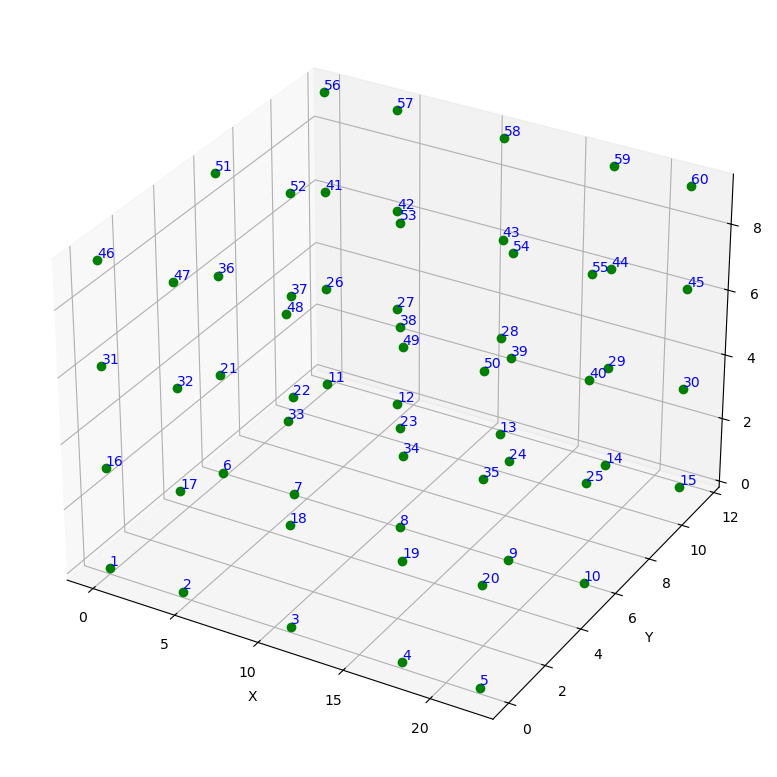

In [ ]:
# ============================================
# DEFINICIÓN DE NODOS
# ============================================

#NODOS PISO 1
ops.node(1, 0, 0, 0)                      #Nodo 1
ops.node(2, L12, 0, 0)                    #Nodo 2
ops.node(3, L12+L23, 0, 0)                #Nodo 3
ops.node(4, L12+L23+L34, 0, 0)            #Nodo 4
ops.node(5, L12+L23+L34+L45, 0, 0)        #Nodo 5
ops.node(6, 0, LAB, 0)                    #Nodo 6
ops.node(7, L12, LAB, 0)                  #Nodo 7
ops.node(8, L12+L23, LAB, 0)              #Nodo 8
ops.node(9, L12+L23+L34, LAB, 0)          #Nodo 9
ops.node(10, L12+L23+L34+L45, LAB, 0)     #Nodo 10
ops.node(11, 0, LAB+LBC, 0)               #Nodo 11
ops.node(12, L12, LAB+LBC, 0)             #Nodo 12
ops.node(13, L12+L23, LAB+LBC, 0)         #Nodo 13
ops.node(14, L12+L23+L34, LAB+LBC, 0)     #Nodo 14
ops.node(15, L12+L23+L34+L45, LAB+LBC, 0) #Nodo 15
nodos_piso1 = list(range(1,16))           #Lista de nodos del piso 1

#NODOS PISO 2
ops.node(16, 0, 0, H1)                     #Nodo 16
ops.node(17, L12, 0, H1)                   #Nodo 17
ops.node(18, L12+L23, 0, H1)               #Nodo 18
ops.node(19, L12+L23+L34, 0, H1)           #Nodo 19
ops.node(20, L12+L23+L34+L45, 0, H1)       #Nodo 20
ops.node(21, 0, LAB, H1)                   #Nodo 21
ops.node(22, L12, LAB, H1)                 #Nodo 22
ops.node(23, L12+L23, LAB, H1)             #Nodo 23
ops.node(24, L12+L23+L34, LAB, H1)         #Nodo 24
ops.node(25, L12+L23+L34+L45, LAB, H1)     #Nodo 25
ops.node(26, 0, LAB+LBC, H1)               #Nodo 26
ops.node(27, L12, LAB+LBC, H1)             #Nodo 27
ops.node(28, L12+L23, LAB+LBC, H1)         #Nodo 28
ops.node(29, L12+L23+L34, LAB+LBC, H1)     #Nodo 29
ops.node(30, L12+L23+L34+L45, LAB+LBC, H1) #Nodo 30
nodos_piso2 = list(range(16,31))           #Lista de nodos del piso 2

#NODOS PISO 3
ops.node(31, 0, 0, H1+H2)                     #Nodo 31
ops.node(32, L12, 0, H1+H2)                   #Nodo 32
ops.node(33, L12+L23, 0, H1+H2)               #Nodo 33
ops.node(34, L12+L23+L34, 0, H1+H2)           #Nodo 34
ops.node(35, L12+L23+L34+L45, 0, H1+H2)       #Nodo 35
ops.node(36, 0, LAB, H1+H2)                   #Nodo 36
ops.node(37, L12, LAB, H1+H2)                 #Nodo 37
ops.node(38, L12+L23, LAB, H1+H2)             #Nodo 38
ops.node(39, L12+L23+L34, LAB, H1+H2)         #Nodo 39
ops.node(40, L12+L23+L34+L45, LAB, H1+H2)     #Nodo 40
ops.node(41, 0, LAB+LBC, H1+H2)               #Nodo 41
ops.node(42, L12, LAB+LBC, H1+H2)             #Nodo 42
ops.node(43, L12+L23, LAB+LBC, H1+H2)         #Nodo 43
ops.node(44, L12+L23+L34, LAB+LBC, H1+H2)     #Nodo 44
ops.node(45, L12+L23+L34+L45, LAB+LBC, H1+H2) #Nodo 45
nodos_piso3 = list(range(31,46))              #Lista de nodos del piso 3

#NODOS CUBIERTA
ops.node(46, 0, 0, H1+H2+H3)                     #Nodo 46
ops.node(47, L12, 0, H1+H2+H3)                   #Nodo 47
ops.node(48, L12+L23, 0, H1+H2+H3)               #Nodo 48
ops.node(49, L12+L23+L34, 0, H1+H2+H3)           #Nodo 49
ops.node(50, L12+L23+L34+L45, 0, H1+H2+H3)       #Nodo 50
ops.node(51, 0, LAB, H1+H2+H3)                   #Nodo 51
ops.node(52, L12, LAB, H1+H2+H3)                 #Nodo 52
ops.node(53, L12+L23, LAB, H1+H2+H3)             #Nodo 53
ops.node(54, L12+L23+L34, LAB, H1+H2+H3)         #Nodo 54
ops.node(55, L12+L23+L34+L45, LAB, H1+H2+H3)     #Nodo 55
ops.node(56, 0, LAB+LBC, H1+H2+H3)               #Nodo 56
ops.node(57, L12, LAB+LBC, H1+H2+H3)             #Nodo 57
ops.node(58, L12+L23, LAB+LBC, H1+H2+H3)         #Nodo 58
ops.node(59, L12+L23+L34, LAB+LBC, H1+H2+H3)     #Nodo 59
ops.node(60, L12+L23+L34+L45, LAB+LBC, H1+H2+H3) #Nodo 60
nodos_cubierta = list(range(46,61))              #Lista de nodos de cubierta

opsv.plot_model(fig_wi_he=(50,25))


Paso X: Definición de columnas

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

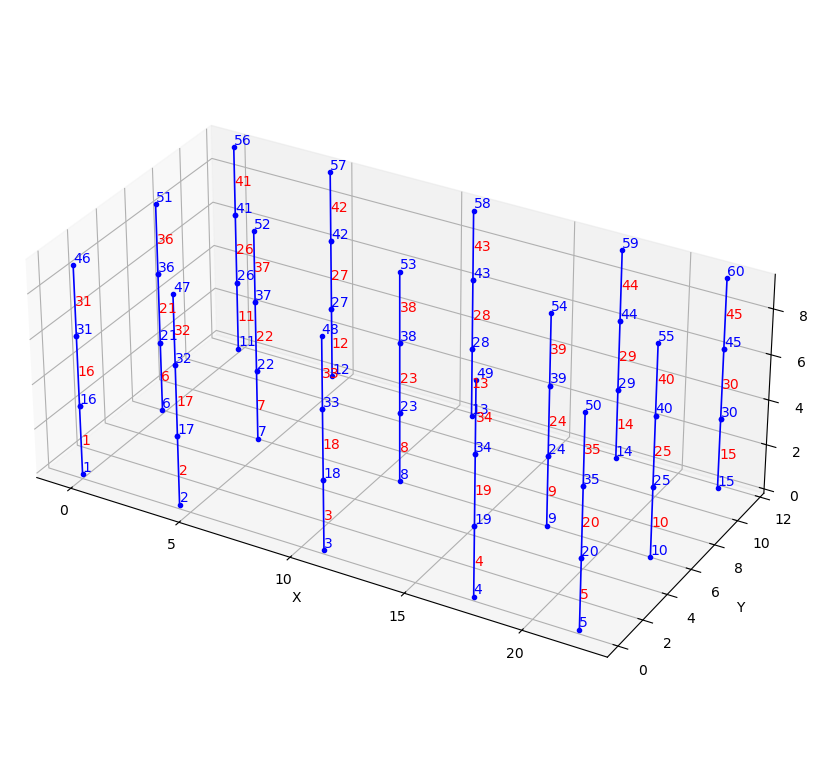

In [ ]:
# ============================================
# DEFINICIÓN DE COLUMNAS
# ============================================

nIpcol=5                                                       # Número de puntos de integración para columnas
ops.beamIntegration('Lobatto', 1, 2, nIpcol)                   # Integración de Lobatto para columnas
for i in range(1,46):                                          
    ops.element('dispBeamColumn',i,*[i,i+15],1,1,'-cMass',0)   # Creación de columnas entre pisos 1-2 y 2-3
opsv.plot_model(fig_wi_he=(50,25), local_axes=False,gauss_points=False,axis_off=0)      # Visualizar modelo

Paso X: Definición de vigas

In [ ]:
# ============================================
# DEFINICIÓN DE VIGAS
# ============================================

# CORRECCIÓN Bug5: usar nIpvig (no nIpcol) en la integración de vigas
nIpvig=3                                      # Número de puntos de integración para vigas
ops.beamIntegration('Lobatto', 2, 1, nIpvig)  # Integración de Lobatto para vigas — sección 1, 3 puntos

#Creación de vigas piso en sentido X
for i in range(16,20):
    ops.element("dispBeamColumn",30+i,*[i,i+1],2,2,'-cMass',0)
for i in range(21,25):
    ops.element("dispBeamColumn",29+i,*[i,i+1],2,2,'-cMass',0)    
for i in range(26,30):
    ops.element("dispBeamColumn",28+i,*[i,i+1],2,2,'-cMass',0)
for i in range(31,35):
    ops.element("dispBeamColumn",27+i,*[i,i+1],2,2,'-cMass',0)
for i in range(36,40):
    ops.element("dispBeamColumn",26+i,*[i,i+1],2,2,'-cMass',0)
for i in range(41,45):
    ops.element("dispBeamColumn",25+i,*[i,i+1],2,2,'-cMass',0)
for i in range(46,50):
    ops.element("dispBeamColumn",24+i,*[i,i+1],2,2,'-cMass',0)
for i in range(51,55):
    ops.element("dispBeamColumn",23+i,*[i,i+1],2,2,'-cMass',0)
for i in range(56,60):
    ops.element("dispBeamColumn",22+i,*[i,i+1],2,2,'-cMass',0)

    
#Creación de vigas piso en sentido Y
for i in range(16,21):
    ops.element("dispBeamColumn",66+i,*[i,i+5],2,2,'-cMass',0)
for i in range(21,26):
    ops.element("dispBeamColumn",66+i,*[i,i+5],2,2,'-cMass',0)
for i in range(31,36):
    ops.element("dispBeamColumn",61+i,*[i,i+5],2,2,'-cMass',0)
for i in range(36,41):
    ops.element("dispBeamColumn",61+i,*[i,i+5],2,2,'-cMass',0)
for i in range(46,51):
    ops.element("dispBeamColumn",56+i,*[i,i+5],2,2,'-cMass',0)
for i in range(51,56):
    ops.element("dispBeamColumn",56+i,*[i,i+5],2,2,'-cMass',0)

opsv.plot_model(fig_wi_he=(50,25), local_axes=False,gauss_points=False,axis_off=0)  # Visualizar modelo

Paso X: Definición de condiciones de apoyo

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

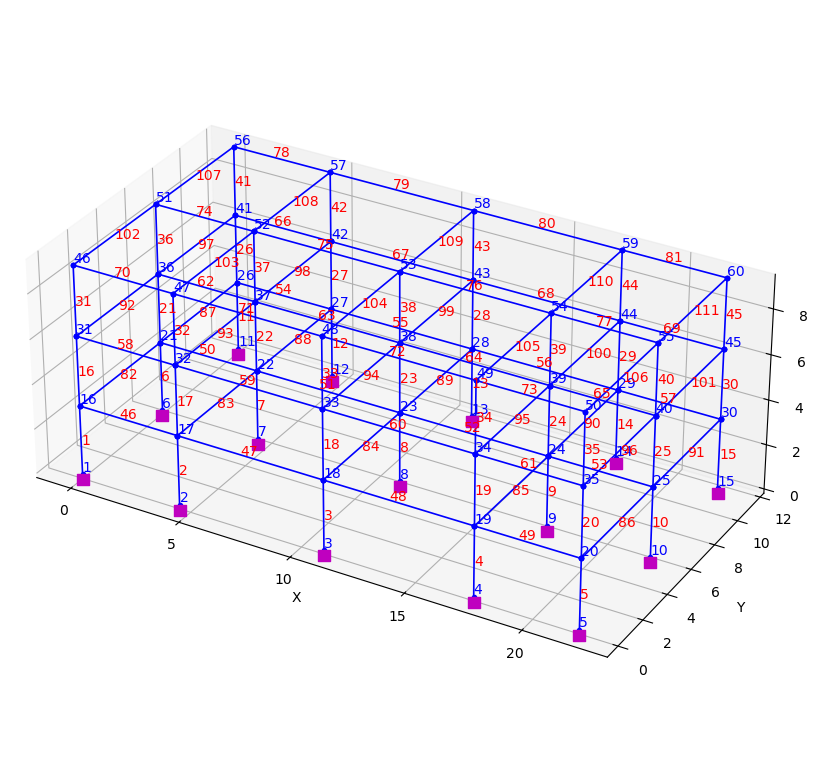

In [ ]:
# ============================================
# DEFINICIÓN DE CONDICIONES DE APOYO
# ============================================

# Definir apoyos fijos en los nodos de la base (1 a 15)
for i in range(1, 16):
    ops.fix(i, 1, 1, 1, 1, 1, 1)
opsv.plot_model(fig_wi_he=(50,25), local_axes=False,gauss_points=False,axis_off=0)  # Visualizar modelo


Paso X : Definición de diafragmas rígidos

In [ ]:
# ============================================
# DEFINICIÓN DE DIAGRAGMAS RÍGIDOS
# ============================================

nodo_maestro_p2=23    # Nodo maestro piso 2
nodo_maestro_p3=38    # Nodo maestro piso 3
nodo_maestro_cub=53   # Nodo maestro cubierta

# Excluir el nodo maestro de su propia lista de esclavos (evita restricción contradictoria)
esclavos_p2  = [n for n in nodos_piso2    if n != nodo_maestro_p2]
esclavos_p3  = [n for n in nodos_piso3    if n != nodo_maestro_p3]
esclavos_cub = [n for n in nodos_cubierta if n != nodo_maestro_cub]

ops.rigidDiaphragm(3, nodo_maestro_p2,  *esclavos_p2)   # Diafragma Piso 2
ops.rigidDiaphragm(3, nodo_maestro_p3,  *esclavos_p3)   # Diafragma Piso 3
ops.rigidDiaphragm(3, nodo_maestro_cub, *esclavos_cub)  # Diafragma Cubierta

Paso X: Cálculo de cargas

In [ ]:
# ============================================
# CÁLCULO DE CARGAS MUERTAS Y VIVAS
# ============================================

# -----------------------
# CÁLCULO DE PESO PROPIO 
# -----------------------

ρconcreto = 24*kN/m**3            # Densidad del concreto de columnas

# 1. Peso propio de columnas
Wcol1 = ρconcreto * b2 * h2 * H1 / Apiso  # Peso propio de columnas piso 1
Wcol2 = ρconcreto * b2 * h2 * H2 / Apiso  # Peso propio de columnas piso 2
Wcol3 = ρconcreto * b2 * h2 * H3 / Apiso  # Peso propio de columnas piso 3

# 2. Peso propio de vigas
Wvig1a5 = ρconcreto * b1 * h1 * (LAB+LBC) / Apiso           # Peso propio de vigas de ejes 1 a 5
WvigAaC = ρconcreto * b1 * h1 * (L12+L23+L34+L45) / Apiso   # Peso propio de vigas de ejes A, B y C   

# 3. Peso de losa aligerada unidireccional
eloseta = 0.05*m       # Espesor de losa
bviguetas = 0.12*m     # Ancho de viguetas
hviguetas = 0.35*m     # Peralte de viguetas
Sviguetas = 1.20*m     # Separación entre viguetas
Wlosa = ρconcreto * (eloseta + (bviguetas*hviguetas/Sviguetas))  # Peso propio de losa aligerada


# -----------------------
# CÁLCULO DE CARGA MUERTA 
# -----------------------

Wcielo = 0.10*kN/m**2                  # Carga muerta de cielo raso - Tableros de yeso 1/2" espesor
Wpisos = 1.10*kN/m**2                  # Carga muerta de acabados de pisos - Baldosa cerámica (20mm) sobre 25mm de mortero
Wmuros = 2.50*kN/m**2                  # Carga muerta de muros divisorios - Mampostería de bloque de arcilla 15cm de espesor pañetado en ambas caras
Wentrepiso = Wcielo + Wpisos + Wmuros  # Carga muerta total de entrepiso

Wcubierta = 0.20*kN/m**2               # Carga muerta de cubierta

# -----------------------
# CÁLCULO DE CARGA VIVA
# -----------------------

Wviva = 1.80*kN/m**2                  # Carga viva de uso residencial

# -----------------------
# MAYORACIÓN DE CARGAS
# -----------------------

γCM = 1.2                                                      # Factor de mayoración para carga muerta
γCV = 1.6                                                      # Factor de mayoración para carga viva
CM2 = γCM * (Wcol2 + Wvig1a5 + WvigAaC + Wlosa + Wentrepiso)   # Carga muerta mayorada piso 2
CM3 = γCM * (Wcol3 + Wvig1a5 + WvigAaC + Wlosa + Wentrepiso)   # Carga muerta mayorada piso 3
CMcub = γCM * (Wvig1a5 + WvigAaC + Wcubierta)                  # Carga muerta mayorada cubierta
CV = γCV * Wviva * 0.25                                        # Carga viva mayorada (25% de la carga viva)

Cp2 = (CM2 + CV)/g      # Subtotal Masa total piso 2
Cp3 = (CM3 + CV)/g      # Subtotal Masa total piso 3
Cpcub = (CMcub + CV)/g  # Subtotal Masa total cubierta

Mp2 = Cp2 * Apiso       # Masa total piso 2
Mp3 = Cp3 * Apiso       # Masa total piso 3
Mpcub = Cpcub * Apiso   # Masa total cubierta
Mtotal= Mp2+Mp3+Mpcub   # Masa total del edificio

# -----------------------------------
# CÁLCULO DE ÁREAS AFERENTES POR NODO
# -----------------------------------

AFN1A = L12/2 * LAB/2                      #Área aferente de los nodos 1A
AFN2A = (L12/2 + L23/2) * LAB/2            #Área aferente de los nodos 2A
AFN3A = (L23/2 + L34/2) * LAB/2            #Área aferente de los nodos 3A
AFN4A = (L34/2 + L45/2) * LAB/2            #Área aferente de los nodos 4A
AFN5A = L45/2 * LAB/2                      #Área aferente de los nodos 5A
AFN1B = (LAB/2 + LBC/2) * L12/2            #Área aferente de los nodos 1B
AFN2B = (LAB/2 + LBC/2) * (L12/2 + L23/2)  #Área aferente de los nodos 2B
AFN3B = (LAB/2 + LBC/2) * (L23/2 + L34/2)  #Área aferente de los nodos 3B
AFN4B = (LAB/2 + LBC/2) * (L34/2 + L45/2)  #Área aferente de los nodos 4B
AFN5B = (LAB/2 + LBC/2) * L45/2            #Área aferente de los nodos 5B              
AFN1C = L12/2 * LBC/2                      #Área aferente de los nodos 1C
AFN2C = (L12/2 + L23/2) * LBC/2            #Área aferente de los nodos 2C
AFN3C = (L23/2 + L34/2) * LBC/2            #Área aferente de los nodos 3C
AFN4C = (L34/2 + L45/2) * LBC/2            #Área aferente de los nodos 4C
AFN5C = L45/2 * LBC/2                      #Área aferente de los nodos 5C


Paso X: Aplicación de cargas

In [ ]:
# ===================================================================================
# ASIGNACIÓN DE MASAS A NODOS (Paso opcional, sólo requerido para análisis dinámicos)
# ===================================================================================

# ASIGNACIÓN DE MASAS EN NODOS PISO 2
# A cada nodo se le asigna la masa correspondiente a la carga muerta y viva mayoradas multiplicada por su área aferente
ops.mass(16,Cp2*AFN1A/9.81,Cp2*AFN1A/9.81,Cp2*AFN1A/9.81,0,0,0)
ops.mass(17,Cp2*AFN2A/9.81,Cp2*AFN2A/9.81,Cp2*AFN2A/9.81,0,0,0)
ops.mass(18,Cp2*AFN3A/9.81,Cp2*AFN3A/9.81,Cp2*AFN3A/9.81,0,0,0)
ops.mass(19,Cp2*AFN4A/9.81,Cp2*AFN4A/9.81,Cp2*AFN4A/9.81,0,0,0)
ops.mass(20,Cp2*AFN5A/9.81,Cp2*AFN5A/9.81,Cp2*AFN5A/9.81,0,0,0)
ops.mass(21,Cp2*AFN1B/9.81,Cp2*AFN1B/9.81,Cp2*AFN1B/9.81,0,0,0)
ops.mass(22,Cp2*AFN2B/9.81,Cp2*AFN2B/9.81,Cp2*AFN2B/9.81,0,0,0)
ops.mass(23,Cp2*AFN3B/9.81,Cp2*AFN3B/9.81,Cp2*AFN3B/9.81,0,0,0)
ops.mass(24,Cp2*AFN4B/9.81,Cp2*AFN4B/9.81,Cp2*AFN4B/9.81,0,0,0)
ops.mass(25,Cp2*AFN5B/9.81,Cp2*AFN5B/9.81,Cp2*AFN5B/9.81,0,0,0)
ops.mass(26,Cp2*AFN1C/9.81,Cp2*AFN1C/9.81,Cp2*AFN1C/9.81,0,0,0)
ops.mass(27,Cp2*AFN2C/9.81,Cp2*AFN2C/9.81,Cp2*AFN2C/9.81,0,0,0)
ops.mass(28,Cp2*AFN3C/9.81,Cp2*AFN3C/9.81,Cp2*AFN3C/9.81,0,0,0)
ops.mass(29,Cp2*AFN4C/9.81,Cp2*AFN4C/9.81,Cp2*AFN4C/9.81,0,0,0)
ops.mass(30,Cp2*AFN5C/9.81,Cp2*AFN5C/9.81,Cp2*AFN5C/9.81,0,0,0)
#-----------------------------------------------
# ASIGNACIÓN DE MASAS EN NODOS PISO 3
ops.mass(31,Cp3*AFN1A/9.81,Cp3*AFN1A/9.81,Cp3*AFN1A/9.81,0,0,0)
ops.mass(32,Cp3*AFN2A/9.81,Cp3*AFN2A/9.81,Cp3*AFN2A/9.81,0,0,0)
ops.mass(33,Cp3*AFN3A/9.81,Cp3*AFN3A/9.81,Cp3*AFN3A/9.81,0,0,0)
ops.mass(34 ,Cp3*AFN4A/9.81,Cp3*AFN4A/9.81,Cp3*AFN4A/9.81,0,0,0)
ops.mass(35 ,Cp3*AFN5A/9.81,Cp3*AFN5A/9.81,Cp3*AFN5A/9.81,0,0,0)
ops.mass(36 ,Cp3*AFN1B/9.81,Cp3*AFN1B/9.81,Cp3*AFN1B/9.81,0,0,0)
ops.mass(37 ,Cp3*AFN2B/9.81,Cp3*AFN2B/9.81,Cp3*AFN2B/9.81,0,0,0)
ops.mass(38 ,Cp3*AFN3B/9.81,Cp3*AFN3B/9.81,Cp3*AFN3B/9.81,0,0,0)
ops.mass(39 ,Cp3*AFN4B/9.81,Cp3*AFN4B/9.81,Cp3*AFN4B/9.81,0,0,0)
ops.mass(40 ,Cp3*AFN5B/9.81,Cp3*AFN5B/9.81,Cp3*AFN5B/9.81,0,0,0)
ops.mass(41 ,Cp3*AFN1C/9.81,Cp3*AFN1C/9.81,Cp3*AFN1C/9.81,0,0,0)
ops.mass(42 ,Cp3*AFN2C/9.81,Cp3*AFN2C/9.81,Cp3*AFN2C/9.81,0,0,0)
ops.mass(43 ,Cp3*AFN3C/9.81,Cp3*AFN3C/9.81,Cp3*AFN3C/9.81,0,0,0)
ops.mass(44 ,Cp3*AFN4C/9.81,Cp3*AFN4C/9.81,Cp3*AFN4C/9.81,0,0,0)
ops.mass(45 ,Cp3*AFN5C/9.81,Cp3*AFN5C/9.81,Cp3*AFN5C/9.81,0,0,0)
#-----------------------------------------------
# ASIGNACIÓN DE MASAS EN NODOS DE CUBIERTA
ops.mass(46,Cpcub*AFN1A/9.81,Cpcub*AFN1A/9.81,Cpcub*AFN1A/9.81,0,0,0)
ops.mass(47,Cpcub*AFN2A/9.81,Cpcub*AFN2A/9.81,Cpcub*AFN2A/9.81,0,0,0)
ops.mass(48,Cpcub*AFN3A/9.81,Cpcub*AFN3A/9.81,Cpcub*AFN3A/9.81,0,0,0)
ops.mass(49,Cpcub*AFN4A/9.81,Cpcub*AFN4A/9.81,Cpcub*AFN4A/9.81,0,0,0)
ops.mass(50,Cpcub*AFN5A/9.81,Cpcub*AFN5A/9.81,Cpcub*AFN5A/9.81,0,0,0)
ops.mass(51,Cpcub*AFN1B/9.81,Cpcub*AFN1B/9.81,Cpcub*AFN1B/9.81,0,0,0)
ops.mass(52,Cpcub*AFN2B/9.81,Cpcub*AFN2B/9.81,Cpcub*AFN2B/9.81,0,0,0)
ops.mass(53,Cpcub*AFN3B/9.81,Cpcub*AFN3B/9.81,Cpcub*AFN3B/9.81,0,0,0)
ops.mass(54,Cpcub*AFN4B/9.81,Cpcub*AFN4B/9.81,Cpcub*AFN4B/9.81,0,0,0)
ops.mass(55,Cpcub*AFN5B/9.81,Cpcub*AFN5B/9.81,Cpcub*AFN5B/9.81,0,0,0)
ops.mass(56,Cpcub*AFN1C/9.81,Cpcub*AFN1C/9.81,Cpcub*AFN1C/9.81,0,0,0)
ops.mass(57,Cpcub*AFN2C/9.81,Cpcub*AFN2C/9.81,Cpcub*AFN2C/9.81,0,0,0)
ops.mass(58,Cpcub*AFN3C/9.81,Cpcub*AFN3C/9.81,Cpcub*AFN3C/9.81,0,0,0)
ops.mass(59,Cpcub*AFN4C/9.81,Cpcub*AFN4C/9.81,Cpcub*AFN4C/9.81,0,0,0)
ops.mass(60,Cpcub*AFN5C/9.81,Cpcub*AFN5C/9.81,Cpcub*AFN5C/9.81,0,0,0)
# ============================================




Paso X: Asignación de cargas a vigas

In [ ]:
# ==================================================
# ASIGNACIÓN DE CARGAS VERTICALES EN VIGAS
# ==================================================
# IDs de vigas X por piso y eje (calculados a partir de los loops de creación):
#   Piso 2 — Eje A: 46-49  Eje B: 50-53  Eje C: 54-57  (4 vigas/eje, 4 vanos)
#   Piso 3 — Eje A: 58-61  Eje B: 62-65  Eje C: 66-69  (4 vigas/eje)
#   Cubierta— Eje A: 70-73  Eje B: 74-77  Eje C: 78-81  (4 vigas/eje)

ops.timeSeries("Linear",1)
ops.pattern("Plain",1,1)

# PISO 2
for i in range(46,50):   # Eje A — 4 vigas, área aferente LAB/2
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cp2*g*LAB/2,0)
for i in range(50,54):   # Eje B — 4 vigas, área aferente (LAB+LBC)/2
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cp2*g*(LAB/2 + LBC/2),0)
for i in range(54,58):   # Eje C — 4 vigas, área aferente LBC/2
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cp2*g*LBC/2,0)

# PISO 3
# CORRECCIÓN: los IDs del piso 3 van de 58 a 69 (no de 58 a 69 con offsets incorrectos)
for i in range(58,62):   # Eje A — 4 vigas (IDs 58,59,60,61)
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cp3*g*LAB/2,0)
for i in range(62,66):   # Eje B — 4 vigas (IDs 62,63,64,65)
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cp3*g*(LAB/2 + LBC/2),0)
for i in range(66,70):   # Eje C — 4 vigas (IDs 66,67,68,69)
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cp3*g*LBC/2,0)

# CUBIERTA
# CORRECCIÓN: los IDs de cubierta van de 70 a 81 (no con offsets incorrectos)
for i in range(70,74):   # Eje A — 4 vigas (IDs 70,71,72,73)
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cpcub*g*LAB/2,0)
for i in range(74,78):   # Eje B — 4 vigas (IDs 74,75,76,77)
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cpcub*g*(LAB/2 + LBC/2),0)
for i in range(78,82):   # Eje C — 4 vigas (IDs 78,79,80,81)
    ops.eleLoad("-ele",i,"-type","-beamUniform",0,-Cpcub*g*LBC/2,0)

# Visualizar modelo
opsv.plot_load(nep=8, sfac=True, fig_wi_he=(50,25), fig_lbrt=False, fmt_model_loads={'color': 'blue', 'linestyle': 'solid', 'linewidth': 1.2, 'marker': '', 'markersize': 1}, node_supports=False, truss_node_offset=0, local_axes=False, ax=False)

Paso X: Configuración del análisis

In [ ]:
# ===============================================
# CONFIGURACIÓN Y EJECUCIÓN DEL ANÁLISIS ESTÁTICO
# ===============================================

pasos_grav = 10                              # Número de incrementos de carga

# CORRECCIÓN Bug1: usar Transformation (no Plain) para manejar rigidDiaphragm (MPC)
# Plain no procesa correctamente las restricciones multipunto
ops.constraints("Transformation")
ops.numberer("RCM")                          # Renumeración de nodos (Reverse Cuthill-McKee)
ops.system("BandGeneral")                    # Sistema de ecuaciones — robusto para modelos medianos
ops.test("NormDispIncr", 1.0e-5, 100)        # Criterio de convergencia
ops.algorithm("Newton")                      # Newton full actualiza la tangente en cada iteración
ops.integrator("LoadControl", 1/pasos_grav)  # Incrementos iguales de carga gravitacional
ops.analysis("Static")
ok_grav = ops.analyze(pasos_grav)            # Ejecutar análisis gravitacional

# Verificar convergencia de la gravedad — si falla, el estado inicial del pushover será inválido
if ok_grav != 0:
    print(f"ADVERTENCIA: análisis gravitacional NO convergió (ok={ok_grav})")
    print("Intentando con tolerancia laxa y más iteraciones...")
    ops.test("NormDispIncr", 1.0e-3, 500)
    ops.algorithm("KrylovNewton")
    ok_grav2 = ops.analyze(pasos_grav)
    if ok_grav2 != 0:
        print("ERROR: gravedad no converge. Revisar secciones y materiales.")
    else:
        print("Gravedad convergió con algoritmo alternativo.")
else:
    print(f"Análisis gravitacional convergió exitosamente (ok={ok_grav})")

opsv.plot_defo(1e3, fig_wi_he=(50,25))       # Visualizar modelo deformado bajo carga gravitacional
ops.loadConst('-time', 0.0)                  # Anclar cargas gravitacionales — tiempo reiniciado a 0

Paso X: Configuración de análisis de Pushover

In [ ]:
# ==================================================
# CONFIGURACIÓN DEL ANÁLISIS DE PUSHOVER
# ==================================================

ops.timeSeries("Linear",2)   # Serie de tiempo lineal para el patrón lateral
ops.pattern("Plain",2,2)     # Patrón de carga 2 referenciado a timeSeries 2

# ------------------------------------------------------------------
# DEFINICIÓN DE VECTOR DE CARGAS LATERALES POR DISTRIBUCIÓN DE MASAS
# ------------------------------------------------------------------

M2h2 = Mp2 * H1                                # Masa × altura hasta piso 2
M3h3 = Mp3 * (H1+H2)                           # Masa × altura hasta piso 3
Mchc = Mpcub * (H1+H2+H3)                      # Masa × altura hasta cubierta
SumaMh= M2h2 + M3h3 + Mchc                     # Denominador de la distribución
patron=[M2h2/SumaMh, M3h3/SumaMh,Mchc/SumaMh]  # Fracciones de la fuerza lateral total

# ------------------------------------------------------
# APLICACIÓN DE CARGAS LATERALES EN NODOS MAESTROS
# CORRECCIÓN: aplicar carga SOLO en dirección X
# La carga simultánea en Y sin control de desplazamiento en Y
# genera grandes deformaciones no controladas → inestabilidad → NaN
# Para un pushover unidireccional en X, la fuerza en Y debe ser cero
# ------------------------------------------------------

FpushX = 10*kN     # Fuerza de referencia para la distribución lateral en X [kN]
ops.load(nodo_maestro_p2,  FpushX*patron[0], 0, 0, 0, 0, 0)  # Carga en X en nodo maestro piso 2
ops.load(nodo_maestro_p3,  FpushX*patron[1], 0, 0, 0, 0, 0)  # Carga en X en nodo maestro piso 3
ops.load(nodo_maestro_cub, FpushX*patron[2], 0, 0, 0, 0, 0)  # Carga en X en nodo maestro cubierta

# ----------------------------------------
# DEFINICIÓN DE CONTROL DE DESPLAZAMIENTO
# ----------------------------------------

control_dof  = 1                   # DOF controlado: 1 = traslación en X
control_nodo = nodo_maestro_cub    # Nodo maestro de cubierta (53) — DOF libre en X
dU           = 1*mm                # Incremento de desplazamiento por paso [m]

# ----------------------------------------
# CONFIGURACIÓN DE ANÁLISIS PARA PUSHOVER
# CORRECCIÓN algoritmo: Newton full en lugar de ModifiedNewton(-initial)
# ModifiedNewton con rigidez inicial no actualiza la tangente entre iteraciones.
# Cuando las fibras plastifican, la rigidez obsoleta produce NaN en la norma.
# Newton full actualiza K_tangente en cada iteración → convergencia robusta.
# ----------------------------------------

ops.wipeAnalysis()
ops.constraints('Transformation')       # Transformation maneja correctamente los MPC del diafragma
ops.numberer('RCM')
ops.system('BandGeneral')               # Apropiado para modelo de 60 nodos con banda angosta
ops.test('NormDispIncr', 1.0e-4, 100)   # Tolerancia 1e-4, hasta 100 iteraciones por paso
ops.algorithm('Newton')                 # Newton full — actualiza tangente cada iteración
ops.integrator("DisplacementControl", control_nodo, control_dof, dU)
ops.analysis('Static')

# ----------------------------------------
# DEFINICIÓN DE RECORDERS DE SALIDA
# CORRECCIÓN: recorders definidos DESPUÉS de wipeAnalysis() y analysis('Static')
# para que no sean borrados por wipeAnalysis() junto con los objetos de análisis.
# ----------------------------------------

# Desplazamientos del nodo de control (columnas: tiempo, dispX, dispY, dispZ)
ops.recorder("Node", "-file", "desplazamientos.txt", "-time",
             "-node", control_nodo, "-dof", 1,2,3, "disp")
# Reacciones en la base (15 nodos × 3 DOFs)
ops.recorder("Node", "-file", "reacciones_base.txt", "-time",
             "-node", *nodos_piso1, "-dof", 1,2,3, "reaction")
# Fuerzas locales en columnas (IDs 1-45, 12 componentes cada una)
ops.recorder("Element", "-file", "fuerzas_columnas.txt", "-time",
             "-ele", *range(1,46), "localForce")
# CORRECCIÓN Bug6-recorder: rango correcto de vigas es 46-111
ops.recorder("Element", "-file", "fuerzas_vigas.txt", "-time",
             "-ele", *range(46,112), "localForce")

desp_obj             = 0.80*m               # Desplazamiento objetivo del pushover [m]
pasos_push           = int(desp_obj / dU)   # Número total de pasos
desp_actual          = 0                    # Variable de monitoreo
cortante_basal       = 0                    # Variable de monitoreo
max_cortante         = 0                    # Cortante máximo registrado
deriva_max           = 0.05                 # Límite de deriva total: 5% (FEMA 356)
deriva_entrepiso_max = 0.04                 # Límite de deriva de entrepiso: 4% (FEMA 356 RC-OMF colapso)

Paso X : Ejecución del análisis Pushover

In [ ]:
# ==================================================
# EJECUCIÓN DEL ANÁLISIS DE PUSHOVER
# Con estrategia de convergencia adaptativa:
# 1er intento: Newton + NormDispIncr 1e-4 / 100 iter (ya configurado)
# 2do intento: KrylovNewton + EnergyIncr 1e-6 / 100 iter
# 3er intento: NewtonLineSearch + NormDispIncr 1e-3 / 200 iter
# ==================================================

cortante_basal_historial = []   # Historial de cortante basal en cada paso [kN]
desplazamiento_historial = []   # Historial de desplazamiento del nodo de control [m]
deriva_historial         = []   # Historial de deriva total del edificio

for paso in range(pasos_push):
    # --- 1er intento: Newton estándar ---
    ok = ops.analyze(1)

    # --- 2do intento: KrylovNewton + criterio de energía ---
    if ok != 0:
        ops.algorithm('KrylovNewton')
        ops.test('EnergyIncr', 1.0e-6, 100)
        ok = ops.analyze(1)
        # Restaurar configuración estándar para el siguiente paso
        ops.algorithm('Newton')
        ops.test('NormDispIncr', 1.0e-4, 100)

    # --- 3er intento: NewtonLineSearch + tolerancia laxa ---
    if ok != 0:
        ops.algorithm('NewtonLineSearch')
        ops.test('NormDispIncr', 1.0e-3, 200)
        ok = ops.analyze(1)
        # Restaurar configuración estándar
        ops.algorithm('Newton')
        ops.test('NormDispIncr', 1.0e-4, 100)

    if ok != 0:
        print(f"Análisis terminado en paso {paso} por falta de convergencia")
        break

    # ---- CALCULAR DESPLAZAMIENTO Y DERIVA TOTAL ----
    desp_actual = ops.nodeDisp(control_nodo, control_dof)   # Desplazamiento del nodo de control [m]
    deriva      = desp_actual / (H1 + H2 + H3)              # Deriva total del edificio
    desplazamiento_historial.append(desp_actual)
    deriva_historial.append(deriva)

    # ---- CALCULAR CORTANTE BASAL (abs(sum) — cortante neto) ----
    ops.reactions()
    cortante_basal = abs(sum(ops.nodeReaction(n, control_dof) for n in nodos_piso1))
    cortante_basal_historial.append(cortante_basal)

    # ---- ACTUALIZAR CORTANTE MÁXIMO ----
    max_cortante = max(max_cortante, cortante_basal)

    # ---- CALCULAR DERIVA DE ENTREPISO POR PISO ----
    desp_p2  = ops.nodeDisp(nodo_maestro_p2,  control_dof)
    desp_p3  = ops.nodeDisp(nodo_maestro_p3,  control_dof)
    desp_cub = ops.nodeDisp(nodo_maestro_cub, control_dof)
    drift_p1 = desp_p2 / H1
    drift_p2 = (desp_p3 - desp_p2) / H2
    drift_p3 = (desp_cub - desp_p3) / H3
    drift_max_piso = max(drift_p1, drift_p2, drift_p3)

    # ---- CRITERIO 1: EXCESO DE DERIVA TOTAL ----
    if deriva > deriva_max:
        print(f"Análisis terminado: drift ratio {deriva*100:.2f}% "
              f"excede límite de {deriva_max*100:.2f}%")
        break

    # ---- CRITERIO 2: PÉRDIDA DE RESISTENCIA ----
    if paso > 10 and cortante_basal < 0.8 * max_cortante:
        print(f"Análisis terminado en paso {paso}: pérdida significativa de resistencia")
        print(f"  Cortante máximo: {max_cortante:.2f} kN")
        print(f"  Cortante actual: {cortante_basal:.2f} kN")
        break

    # ---- CRITERIO 3: DERIVA DE ENTREPISO ----
    if drift_max_piso > deriva_entrepiso_max:
        piso_critico = [drift_p1, drift_p2, drift_p3].index(drift_max_piso) + 1
        print(f"Análisis terminado: deriva entrepiso piso {piso_critico} = "
              f"{drift_max_piso*100:.2f}% excede límite de {deriva_entrepiso_max*100:.2f}%")
        break


# ========================================
# RESULTADOS FINALES DEL ANÁLISIS
# ========================================

print("\n" + "="*50)
print("RESULTADOS DEL ANÁLISIS DE PUSHOVER")
print("="*50)

desp_final = ops.nodeDisp(control_nodo, control_dof)
ops.reactions()
cortante_final = abs(sum(ops.nodeReaction(n, control_dof) for n in nodos_piso1))

# Derivas finales por entrepiso (para distinguir deriva total vs. deriva de entrepiso)
desp_p2_final = ops.nodeDisp(nodo_maestro_p2, control_dof)
desp_p3_final = ops.nodeDisp(nodo_maestro_p3, control_dof)

print(f"Número de pasos completados: {paso+1}")
print(f"Desplazamiento final:        {desp_final/mm:.2f} mm")
print(f"Cortante basal final:        {cortante_final/kN:.2f} kN")
print(f"Cortante basal máximo:       {max_cortante/kN:.2f} kN")
print(f"Deriva total (techo/altura): {(desp_final/(H1+H2+H3))*100:.2f}%")
print(f"Deriva entrepiso piso 1:     {(desp_p2_final/H1)*100:.2f}%")
print(f"Deriva entrepiso piso 2:     {((desp_p3_final-desp_p2_final)/H2)*100:.2f}%")
print(f"Deriva entrepiso piso 3:     {((desp_final-desp_p3_final)/H3)*100:.2f}%")

# ========================================
# CONVERTIR A ARRAYS DE NUMPY
# ========================================

cortante_basal_historial = np.array(cortante_basal_historial)  # [kN]
desplazamiento_historial = np.array(desplazamiento_historial)  # [m]
deriva_historial         = np.array(deriva_historial)          # [adimensional]

In [ ]:
# ==================================================
# PROCESAMIENTO DE DATOS DE SALIDA
# ==================================================

# CORRECCIÓN Bug6: np.loadtxt retorna array 1D si solo hay 1 paso guardado.
# np.atleast_2d garantiza que la indexación [:, col] funcione en cualquier caso.
# CORRECCIÓN Bug7: cuando el análisis termina por Criterio 3 (deriva de entrepiso),
# el recorder escribe el timestamp del último paso pero el break interrumpe antes de
# registrar los desplazamientos → última línea truncada (1 col en vez de 4).
# np.genfromtxt con invalid_raise=False tolera filas incompletas rellenando con NaN;
# luego se descartan esas filas antes de indexar columnas.
datos_desp = np.atleast_2d(np.genfromtxt('desplazamientos.txt', invalid_raise=False))
datos_desp = datos_desp[~np.isnan(datos_desp).any(axis=1)]  # descartar fila incompleta

pasos_tiempo    = datos_desp[:, 0]   # columna de tiempo (factor de carga)
desplazamientoX = datos_desp[:, 1]   # desplazamiento en X del nodo de control [m]
desplazamientoY = datos_desp[:, 2]   # desplazamiento en Y del nodo de control [m]
desplazamientoZ = datos_desp[:, 3]   # desplazamiento en Z del nodo de control [m]

print(f"Pasos guardados en recorder: {len(pasos_tiempo)}")
print(f"Desplazamiento máximo en X:  {desplazamientoX.max()*1000:.2f} mm")
print(f"Desplazamiento máximo en Y:  {desplazamientoY.max()*1000:.4f} mm")

Paso X : Generar la curva Pushover

In [ ]:
# ==================================================
# GRAFICACIÓN DE CURVA PUSHOVER
# ==================================================

plt.figure(figsize=(10, 6))
plt.plot(desplazamiento_historial, cortante_basal_historial, 'b-', linewidth=2)
plt.xlabel('Desplazamiento de techo (m)', fontsize=12)
plt.ylabel('Cortante basal (kN)', fontsize=12)
plt.title('Curva de Capacidad - Análisis Pushover Dirección X', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('curva_pushover.png', dpi=600)
plt.show()
